# 군집화(Clustering) - K-Means Algorithm

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Iris 데이터를 차원 축소

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
iris = load_iris()
scaler = StandardScaler()
iris_std = scaler.fit_transform(iris.data)

In [ ]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_std)

In [ ]:
df = pd.DataFrame(iris.data, columns=['sl','sw','pl','pw'])
df['PC1'] = iris_pca[:,0]
df['PC2'] = iris_pca[:,1]
df.head()

,sl,sw,pl,pw,PC1,PC2
0,5.1,3.5,1.4,0.2,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,-2.389842,0.646835


### K-Means 모델 생성/학습

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=2021)

In [ ]:
kmeans.fit(iris_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [ ]:
df['target'] = iris.target
df['cluster'] = kmeans.labels_
df.tail()

,sl,sw,pl,pw,PC1,PC2,target,cluster
145,6.7,3.0,5.2,2.3,1.870503,0.386966,2,1
146,6.3,2.5,5.0,1.9,1.564580,-0.896687,2,2
147,6.5,3.0,5.2,2.0,1.521170,0.269069,2,1
148,6.2,3.4,5.4,2.3,1.372788,1.011254,2,1
149,5.9,3.0,5.1,1.8,0.960656,-0.024332,2,2


In [ ]:
# clustering 결과
df.groupby(['target','cluster'])[['sl']].count()

sl
target cluster    
0      0        50
1      1        11
       2        39
2      1        36
       2        14

### 데이터 시각화
- 군집화한 결과를 차원축소하여 시각화

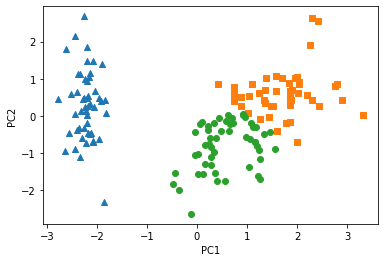

In [16]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- 원 데이터를 차원축소하여 시각화

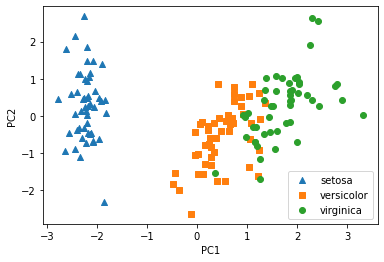

In [17]:
for i, marker in enumerate(markers):
    x_data = df[df.target == i]['PC1']
    y_data = df[df.target == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker,
                label=iris.target_names[i])

plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- 비교 그림

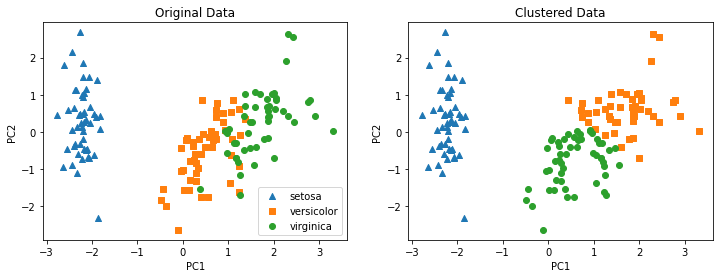

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))
for k, column in enumerate(['target','cluster']):
    ax = axs[k]
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        ax.scatter(x_data, y_data, marker=marker,
                    label=iris.target_names[i])
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        
    if k == 0:      # target column, 즉 original
        ax.legend()
        ax.set_title('Original Data')
    else:
        ax.set_title('Clustered Data')

plt.show()